In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime
# from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_checks = pd.read_csv('/content/drive/MyDrive/20210518_checks.csv') #,index_col='date',parse_dates=True)

Mounted at /content/drive


In [ ]:
df_groups = pd.read_csv('/content/20210518_hierarchy.csv')

In [ ]:
df_offers = pd.read_csv('/content/20210521_offers.csv') #C:/Users/supriya.taplar/OneDrive - NHS Supplychain/Documents/General/Dissertation/hackpromo_dataset (1)/Lenta hack/20210521_offers.csv")

In [ ]:
df_checks.shape

(21479259, 12)

In [ ]:
df_checks["day"].min(), df_checks["day"].max()

(20190920, 20200920)

In [ ]:
df_checks.columns

Index(['client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id',
       'check_pos', 'num_sales', 'supplier_price', 'selling_price',
       'region_name'],
      dtype='object')

In [ ]:
df_groups.shape

(80406, 5)

In [ ]:
df_groups.columns

Index(['sku', 'hierarchy_level1', 'hierarchy_level2', 'hierarchy_level3',
       'hierarchy_level4'],
      dtype='object')

In [ ]:
df_offers.shape

(9776, 6)

In [ ]:
df_offers.head()

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group
0,Facades,F26,71c770923102af052f64c6036c9dd590,20200213,20200219,train
1,Facades,F2,e87788b585ead792a4d40f7de18f2f76,20200102,20200108,train
2,Facades,F9,5ae92b5e465d630285677e80b43fe5f7,20200116,20200122,train
3,Facades,F45,0790b472112a765339f0e5c3f66816ee,20200319,20200325,train
4,Facades,F191,e87788b585ead792a4d40f7de18f2f76,20201112,20201118,test


In [ ]:
df_offers.columns

Index(['Promo_type', 'Offer_ID', 'sku', 'start_date', 'end_date',
       'train_test_group'],
      dtype='object')

In [ ]:
df_checks = df_checks.drop(['client_id','shop_id','check_id','check_pos','time'], axis=1)

In [ ]:
df_checks.shape

(21479259, 7)

In [ ]:
df_groups.shape

(80406, 5)

In [ ]:
df_offers.shape

(9776, 6)

In [ ]:
df_checks.isnull().sum()

day               0
sku               0
promo_id          0
num_sales         0
supplier_price    0
selling_price     0
region_name       0
dtype: int64

In [ ]:
df_groups.isnull().sum()

sku                 0
hierarchy_level1    0
hierarchy_level2    0
hierarchy_level3    0
hierarchy_level4    0
dtype: int64

In [ ]:
df_offers.isnull().sum()

Promo_type          0
Offer_ID            0
sku                 0
start_date          0
end_date            0
train_test_group    0
dtype: int64

In [ ]:
# checking for validity
print("checks dataset: \n")
print(df_checks.duplicated().sum())
print("groups dataset: \n")
print(df_groups.duplicated().sum())
print("offers dataset: \n")
print(df_offers.duplicated().sum())

checks dataset: 

3846811
groups dataset: 

0
offers dataset: 

0


In [ ]:
# checking for uniformity
print("checks dataset: \n")
print(df_checks.info())
print("groups dataset: \n")
print(df_groups.info())
print("offers dataset: \n")
print(df_offers.info())

checks dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21479259 entries, 0 to 21479258
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   day             int64  
 1   sku             object 
 2   promo_id        object 
 3   num_sales       float64
 4   supplier_price  float64
 5   selling_price   float64
 6   region_name     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ GB
None
groups dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80406 entries, 0 to 80405
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sku               80406 non-null  object
 1   hierarchy_level1  80406 non-null  object
 2   hierarchy_level2  80406 non-null  object
 3   hierarchy_level3  80406 non-null  object
 4   hierarchy_level4  80406 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB
None
offers dataset: 

<class 'pandas.core.frame.Dat

In [ ]:
df_offers.shape

(9776, 6)

In [ ]:
#df_offers['start_date'] = pd.to_datetime(df_offers['start_date'], format='%Y%m%d')
#df_offers['end_date'] = pd.to_datetime(df_offers['end_date'], format='%Y%m%d')

In [ ]:
#df_offers['Dates'] = [pd.date_range(x, y) for x , y in zip(df_offers['start_date'],df_offers['end_date'])]
#df_offers = df_offers.explode('Dates')
#df_offers.head()

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group,Dates
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-13
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-14
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-16
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-17


In [ ]:
#df_offers = df_offers[['sku','Dates','Promo_type','train_test_group']].copy()
#df_offers

,sku,Dates,Promo_type,train_test_group
0,71c770923102af052f64c6036c9dd590,2020-02-13,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-14,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-15,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-16,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-17,Facades,train
...,...,...,...,...
9775,0d73ba0d16f74777b696657bf69a9ef0,2019-11-23,Biweekly,train
9775,0d73ba0d16f74777b696657bf69a9ef0,2019-11-24,Biweekly,train
9775,0d73ba0d16f74777b696657bf69a9ef0,2019-11-25,Biweekly,train
9775,0d73ba0d16f74777b696657bf69a9ef0,2019-11-26,Biweekly,train


In [ ]:
#df_offers.duplicated(subset=["Dates","sku"]).sum()

723

In [ ]:
#df_offers.drop_duplicates(subset=["Dates","sku"],keep=False, inplace=True)

In [ ]:
#df_offers.shape

(133257, 4)

In [ ]:
#df_offers.head()

,sku,Dates,Promo_type,train_test_group
0,71c770923102af052f64c6036c9dd590,2020-02-13,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-14,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-15,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-16,Facades,train
0,71c770923102af052f64c6036c9dd590,2020-02-17,Facades,train


In [ ]:
#df_offers = pd.read_csv("C:/Users/supriya.taplar/OneDrive - NHS Supplychain/Documents/General/Dissertation/hackpromo_dataset (1)/Lenta hack/calendar.csv")

In [ ]:
df_merged = pd.merge(df_checks, df_offers ,on='sku', how='left' )

In [ ]:
df_merged = pd.read_csv('/content/drive/MyDrive/Data.csv', parse_dates=['day'])

In [ ]:
df_merged.head()

,day,sku,promo_id,num_sales,supplier_price,selling_price,region_name,Promo_type,Offer_ID,start_date,end_date,promotional_day
0,2019-12-30,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,1.000,96.77,118.99,152f1b77a32508570e2745daf9ce7aec,Biweekly,287,2020-03-19,2020-04-01,False
1,2019-12-30,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,1.000,96.77,118.99,152f1b77a32508570e2745daf9ce7aec,Biweekly,369,2020-06-25,2020-07-08,False
2,2019-12-30,40e1372e6aebbf19d15dbf80150f96c5,314afc461f361ebf6d9bcc75eb1de65c,0.938,141.33,211.05,152f1b77a32508570e2745daf9ce7aec,Facades,F242,2019-12-12,2019-12-18,False
3,2019-12-30,81897979a2b7322a3854e02eaa8f79ca,7215ee9c7d9dc229d2921a40e899ec5f,2.000,221.37,399.02,152f1b77a32508570e2745daf9ce7aec,Seasonal,459,2020-01-28,2020-02-10,False
4,2019-12-30,f4d3eafd51353fcf6d574d457ad57a61,b9ec0ad93799142a8511180e9f195ae5,1.000,83.82,129.43,152f1b77a32508570e2745daf9ce7aec,Seasonal,108,2020-04-07,2020-04-20,False


In [ ]:
df_merged.columns

Index(['day', 'sku', 'promo_id', 'num_sales', 'supplier_price',
       'selling_price', 'region_name', 'Promo_type', 'Offer_ID', 'start_date',
       'end_date', 'promotional_day'],
      dtype='object')

In [ ]:
df_merged.shape

In [ ]:
#df_merged.to_csv('df_merged.csv', index=False)

In [ ]:
# Drop the 'train_test_group' column
df_merged.drop(columns=['train_test_group'], inplace=True)

# Drop rows with missing values
df_merged.dropna(inplace=True)

In [ ]:
#df_merged.shape

In [ ]:
# Convert 'start_date' and 'end_date' columns to datetime objects
df_merged['start_date'] = pd.to_datetime(df_merged['start_date'], format='%Y%m%d')
df_merged['end_date'] = pd.to_datetime(df_merged['end_date'], format='%Y%m%d')
df_merged['day'] = pd.to_datetime(df_merged['day'], format='%Y%m%d')
df_merged.head()

In [ ]:
#df_merged['Dates'] = [pd.date_range(x, y) for x , y in zip(df_merged['start_date'],df_merged['end_date'])]
#df_merged = df_merged.explode('Dates')
#df_offers.head()

In [ ]:
# Create a new column to indicate whether a sale was promotional or not
#df_merged['promotional_day'] = (df_merged['day'] >= df_merged['start_date']) & (df_merged['day'] <= df_merged['end_date'])

In [ ]:
#df_merged.head()

In [ ]:
#df_merged['promotional_day'].value_counts()

In [ ]:
#df_merged.to_csv('Data.csv', index=False)

<ipython-input-6-739e04f0f7fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='Promo_type', palette='Set2')


AttributeError: module 'matplotlib' has no attribute 'title'

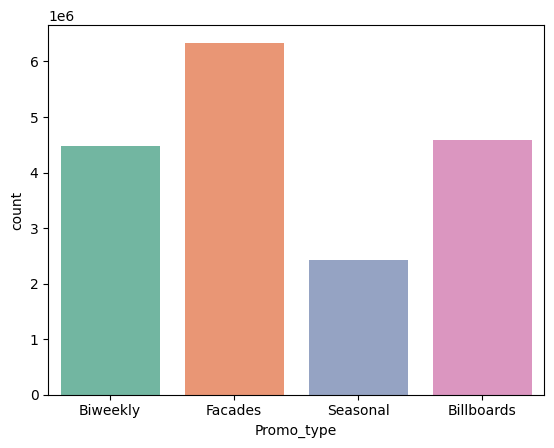

In [ ]:

import seaborn as sns

import matplotlib.pyplot as plt
sns.countplot(data=df_merged, x='Promo_type', palette='Set2')
plt.title("Frequency of Promotion")
plt.xlabel('Promotion')
plt.ylabel('Frequency')

plt.show()

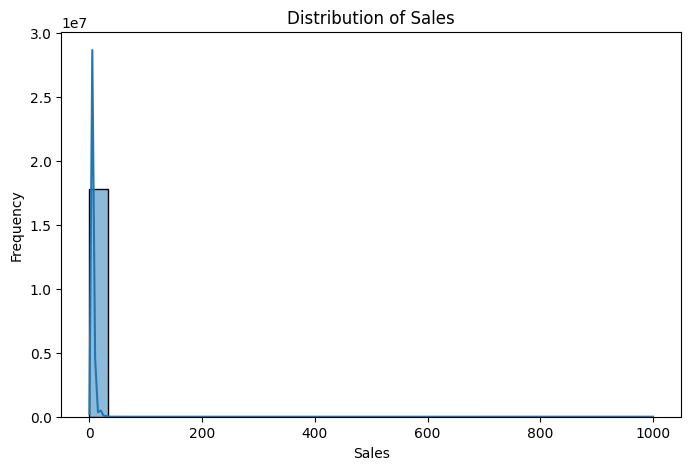

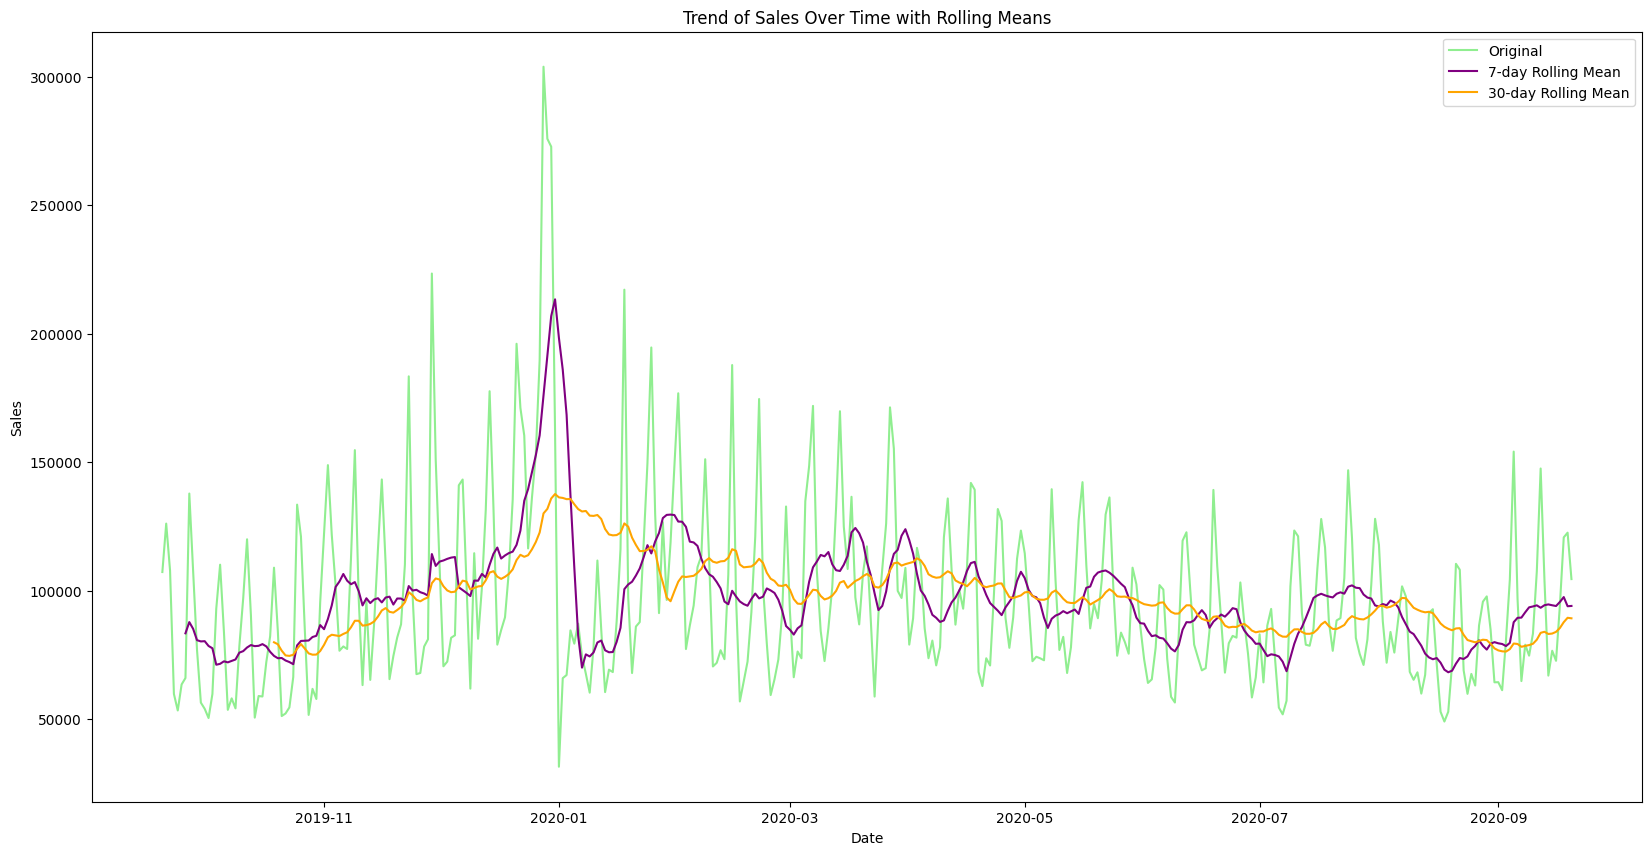

In [ ]:
# Visualize the distribution of Sales
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.histplot(df_merged['num_sales'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Visualize sales over time
# daily sales each month
daily_sales = df_merged.resample('D', on='day')['num_sales'].sum()

daily_sales_weekly = daily_sales.rolling(window=7).mean()
daily_sales_monthly = daily_sales.rolling(window=30).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, label='Original', color = "lightgreen")
sns.lineplot(x=daily_sales_weekly.index, y=daily_sales_weekly.values, label='7-day Rolling Mean', color = "purple")
sns.lineplot(x=daily_sales_monthly.index, y=daily_sales_monthly.values, label='30-day Rolling Mean', color = "orange")
plt.title('Trend of Sales Over Time with Rolling Means')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



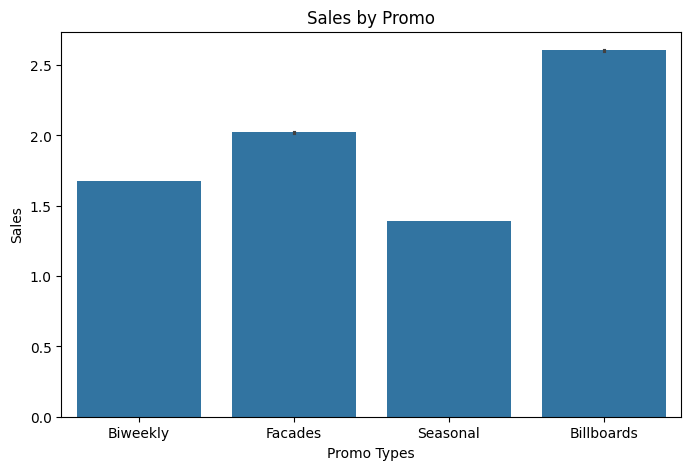

In [ ]:
# Visualize sales by segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Promo_type', y='num_sales', data=df_merged)
plt.title("Sales by Promo")
plt.xlabel("Promo Types")
plt.ylabel("Sales")
plt.show()

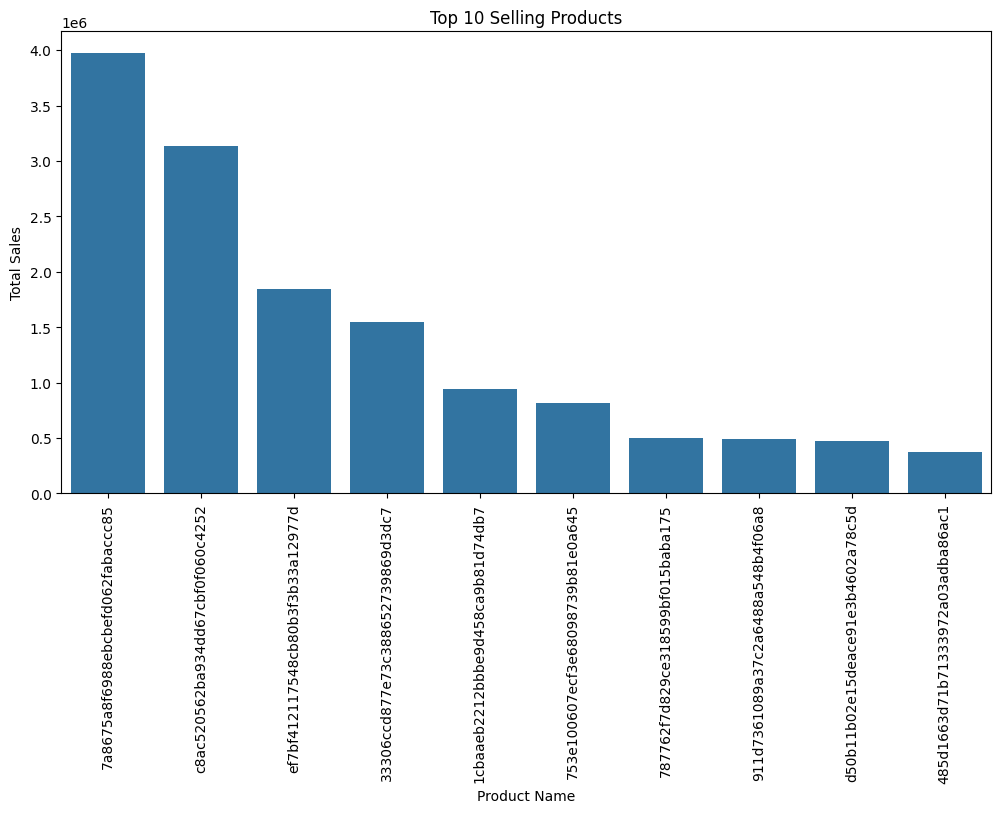

In [ ]:
top_products = df_merged.groupby('sku')['num_sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=90)
plt.title("Top 10 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
print(top_products)

(-1.0999991112474206,
 1.0999891863686615,
 -1.0999991951821075,
 1.0999961265803984)

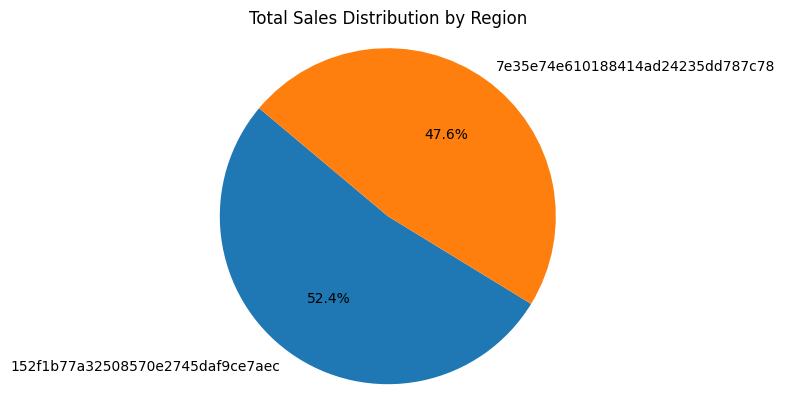

In [ ]:
# Sales by Region
region_sales = df_merged.groupby('region_name')['num_sales'].sum().reset_index().sort_values(by='num_sales', ascending=False)
plt.pie(region_sales['num_sales'], labels=region_sales['region_name'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution by Region')
plt.axis('equal')

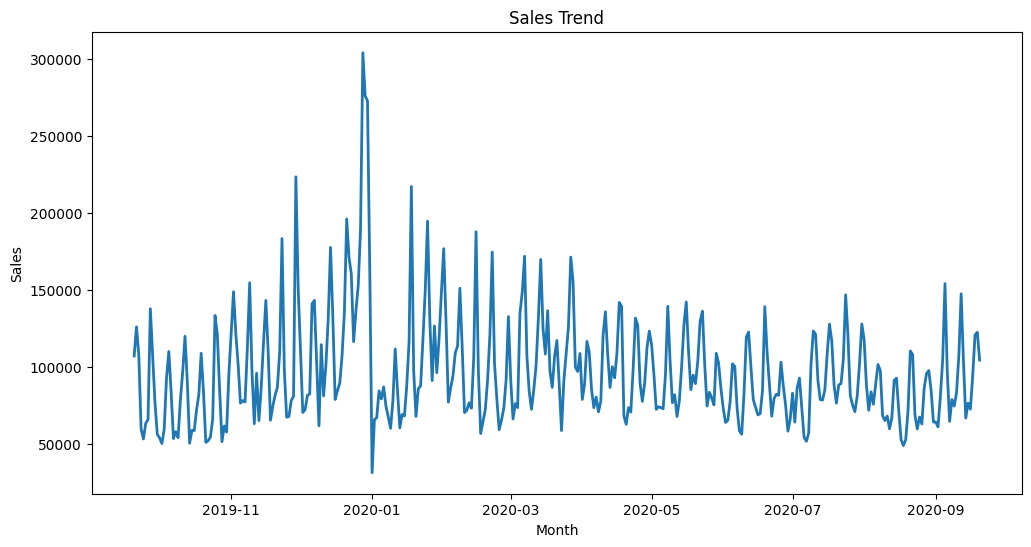

In [ ]:
sales_trend = df_merged.groupby(['day'])['num_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='num_sales', data=sales_trend, linewidth = 2)
plt.title("Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

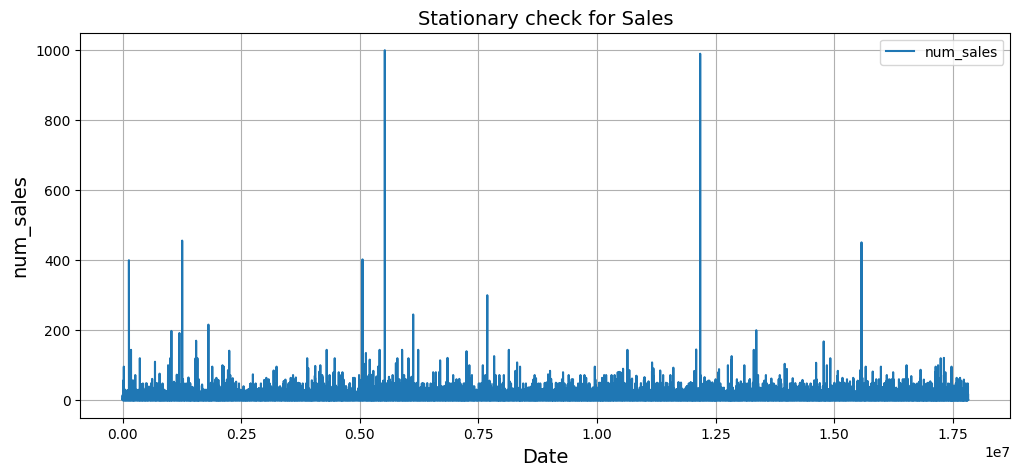

In [ ]:
df_merged[['num_sales']].plot(figsize=(12,5))
plt.title('Stationary check for Sales', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('num_sales', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#df_merged = pd.read_csv('/content/drive/MyDrive/Data.csv')

In [ ]:
#Stationarity check using Addy Fuller test
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = None )
    print("1. ADF :  ", dftest[0])
    print("2. p-Value :  ", dftest[1])
    print("3. Num of Lags :  ", dftest[2])
    print("4. Num of observation Used for ADF Regression and Critical Values Calculation :  ", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key, ": ",val)
    if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(df_merged['num_sales'])

Results of KPSS Test:
Test Statistic              7.447708
p-value                     0.010000
#Lags Used               1489.000000
Critical Value (10%)        0.347000
Critical Value (5%)         0.463000
Critical Value (2.5%)       0.574000
Critical Value (1%)         0.739000
dtype: float64


<ipython-input-5-aec3ac3c5ed4>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [ ]:
#adfuller(df_merged['num_sales'], maxlag=MAX_LAG, autolag=None)

In [ ]:

#ad_test(df_merged['num_sales'])

In [ ]:
non_promo_data = df_merged[df_merged['promotional_day'] == False]
non_promo_data

,day,sku,promo_id,num_sales,supplier_price,selling_price,region_name,Promo_type,Offer_ID,start_date,end_date,promotional_day
0,2019-12-30,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,1.000,96.77,118.99,152f1b77a32508570e2745daf9ce7aec,Biweekly,287,2020-03-19,2020-04-01,False
1,2019-12-30,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,1.000,96.77,118.99,152f1b77a32508570e2745daf9ce7aec,Biweekly,369,2020-06-25,2020-07-08,False
2,2019-12-30,40e1372e6aebbf19d15dbf80150f96c5,314afc461f361ebf6d9bcc75eb1de65c,0.938,141.33,211.05,152f1b77a32508570e2745daf9ce7aec,Facades,F242,2019-12-12,2019-12-18,False
3,2019-12-30,81897979a2b7322a3854e02eaa8f79ca,7215ee9c7d9dc229d2921a40e899ec5f,2.000,221.37,399.02,152f1b77a32508570e2745daf9ce7aec,Seasonal,459,2020-01-28,2020-02-10,False
4,2019-12-30,f4d3eafd51353fcf6d574d457ad57a61,b9ec0ad93799142a8511180e9f195ae5,1.000,83.82,129.43,152f1b77a32508570e2745daf9ce7aec,Seasonal,108,2020-04-07,2020-04-20,False
...,...,...,...,...,...,...,...,...,...,...,...,...
17821451,2020-01-01,0d4018e4a5d93350c3c5accce92f977f,ad6be29f79d856c7e1b2b77036f2be4f,1.000,192.91,216.29,7e35e74e610188414ad24235dd787c78,Seasonal,98,2020-10-06,2020-10-19,False
17821452,2020-01-01,0d4018e4a5d93350c3c5accce92f977f,ad6be29f79d856c7e1b2b77036f2be4f,1.000,192.91,216.29,7e35e74e610188414ad24235dd787c78,Biweekly,550,2020-04-30,2020-05-13,False
17821453,2020-01-01,0d4018e4a5d93350c3c5accce92f977f,ad6be29f79d856c7e1b2b77036f2be4f,1.000,192.91,216.29,7e35e74e610188414ad24235dd787c78,Seasonal,646,2019-10-08,2019-10-21,False
17821454,2020-01-01,1b25e1591c8e6df9b75acc93c83ac0b7,7215ee9c7d9dc229d2921a40e899ec5f,1.196,121.68,179.39,7e35e74e610188414ad24235dd787c78,Seasonal,215,2020-04-14,2020-05-25,False


In [ ]:
#non_promo_data.to_csv('non_promo_data.csv', index=False)

KeyboardInterrupt: 

In [ ]:
non_promo_data["day"].min(), non_promo_data["day"].max()

('2019-09-20', '2020-09-20')

In [ ]:
promo_data = df_merged[df_merged['promotional_day'] == True]


In [ ]:
promo_data.head()


,day,sku,promo_id,num_sales,supplier_price,selling_price,region_name,Promo_type,Offer_ID,start_date,end_date,promotional_day
8,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Billboards,B3,2019-12-26,2020-01-08,True
11,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Billboards,B120,2019-12-26,2020-01-08,True
14,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,3.276,124.91,63.87,152f1b77a32508570e2745daf9ce7aec,Billboards,B3,2019-12-26,2020-01-08,True
17,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,3.276,124.91,63.87,152f1b77a32508570e2745daf9ce7aec,Billboards,B120,2019-12-26,2020-01-08,True
33,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,3.036,115.76,59.19,152f1b77a32508570e2745daf9ce7aec,Billboards,B3,2019-12-26,2020-01-08,True


In [ ]:
promo_data.shape

(1148586, 12)

In [ ]:
promo_data_df = promo_data[promo_data['sku'] == '1cbaaeb2212bbbe9d458ca9b81d74db7']
promo_data_df.head()

,day,sku,promo_id,num_sales,supplier_price,selling_price,region_name,Promo_type,Offer_ID,start_date,end_date,promotional_day
8,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Billboards,B3,2019-12-26,2020-01-08,True
11,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Billboards,B120,2019-12-26,2020-01-08,True
14,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,3.276,124.91,63.87,152f1b77a32508570e2745daf9ce7aec,Billboards,B3,2019-12-26,2020-01-08,True
17,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,3.276,124.91,63.87,152f1b77a32508570e2745daf9ce7aec,Billboards,B120,2019-12-26,2020-01-08,True
33,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,3.036,115.76,59.19,152f1b77a32508570e2745daf9ce7aec,Billboards,B3,2019-12-26,2020-01-08,True


In [ ]:
non_promo_data_df = non_promo_data[non_promo_data['sku'] == '1cbaaeb2212bbbe9d458ca9b81d74db7']
non_promo_data_df.head()

,day,sku,promo_id,num_sales,supplier_price,selling_price,region_name,Promo_type,Offer_ID,start_date,end_date,promotional_day
7,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Billboards,B94,2020-11-12,2020-11-18,False
9,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Facades,F176,2020-10-22,2020-10-28,False
10,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Billboards,B102,2020-12-17,2020-12-23,False
12,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,2.856,108.90,55.68,152f1b77a32508570e2745daf9ce7aec,Billboards,B134,2019-11-07,2019-11-13,False
13,2019-12-30,1cbaaeb2212bbbe9d458ca9b81d74db7,86b055ff16c357a59decc2d7d32f2cc7,3.276,124.91,63.87,152f1b77a32508570e2745daf9ce7aec,Billboards,B94,2020-11-12,2020-11-18,False


In [ ]:
ad_test(df_merged['num_sales'])

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
#fig, ax = plt.subplots(2, 1, figsize=(10, 8))

Total_sales = non_promo_data_df.groupby(['day'])[['num_sales', 'selling_price']].sum().reset_index()
Total_sales.value_counts()

promotional_sales = promo_data_df.groupby(['day'])[['num_sales', 'selling_price']].sum().reset_index()
promotional_sales.value_counts()

plt.figure(figsize=(20, 10))
sns.lineplot(x=Total_sales.day, y=Total_sales.num_sales, label='Original Sales', color = "lightgreen")
sns.lineplot(x=promotional_sales.day, y=promotional_sales.num_sales, label='Promtional Sales', color = "red")


#ax.plot(Total_sales['day'], Total_sales['num_sales'], label='Number of Sales (Total)', color='blue')
#ax.plot(baseline_sales['day'], baseline_sales['selling_price'], label='Baseline Price', color='lightblue')


#ax.plot(promotional_sales['day'], promotional_sales['num_sales'], label='Number of Sales (Promotional)', color='red')
#ax.plot(promo_data_df['day'], promo_data_df['selling_price'], label='Promotional Price', color='lightcoral')

# Set title and legend
#ax.set_title('Sales Analysis')
#ax.legend()

#plt.savefig("salesAnalysis.png")

# Show plot
plt.show()

NameError: name 'non_promo_data_df' is not defined

<Axes: xlabel='day', ylabel='selling_price'>

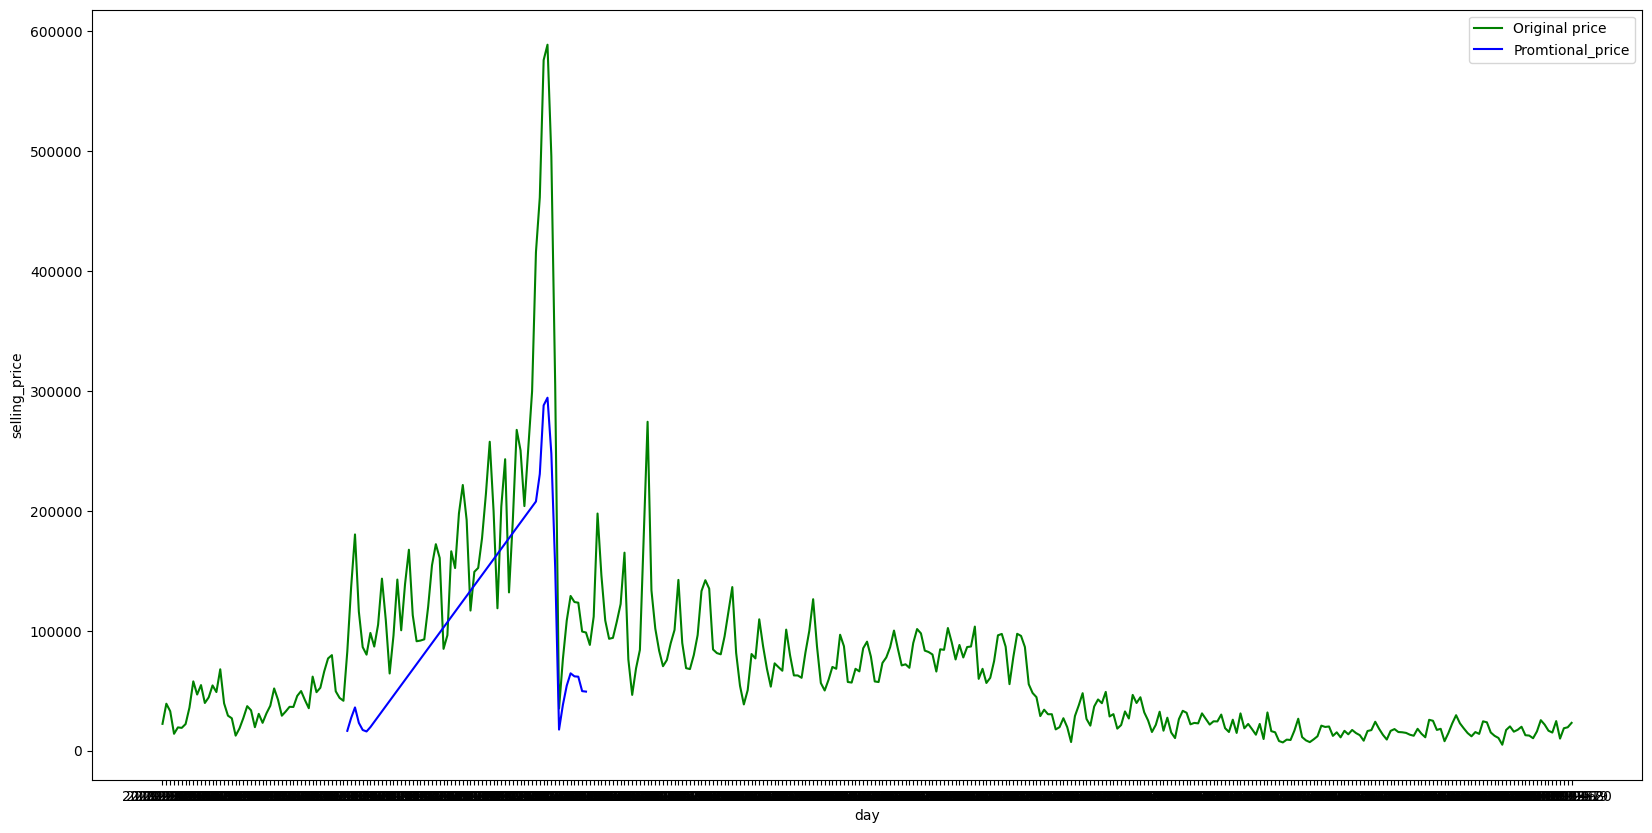

In [ ]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=Total_sales.day, y=Total_sales.selling_price, label='Original price', color = "Green")
sns.lineplot(x=promotional_sales.day, y=promotional_sales.selling_price, label='Promtional_price', color = "blue")

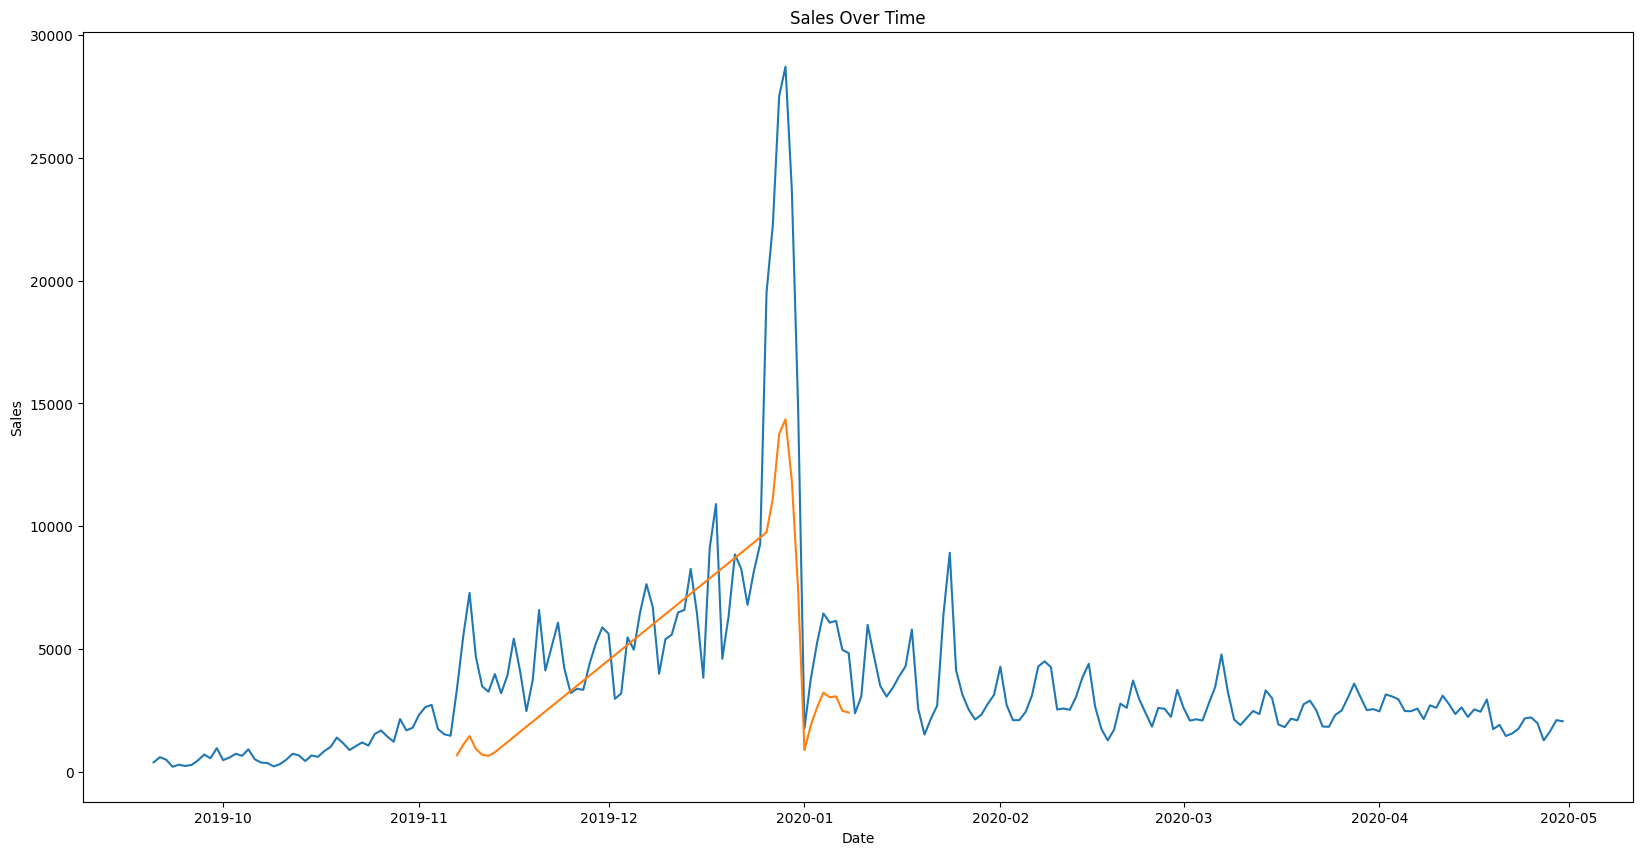

In [ ]:


# Assuming df is your DataFrame and it has columns 'Date' and 'Sales'
# Convert 'Date' to datetime if it's not already
Total_sales['day'] = pd.to_datetime(Total_sales['day'])
promotional_sales['day'] = pd.to_datetime(promotional_sales['day'])
# Define your time range
start_date = '2019-09-20'
end_date = '2020-04-30'

# Filter data based on the defined time range
mask = (Total_sales['day'] >= start_date) & (Total_sales['day'] <= end_date)
df_filtered = Total_sales.loc[mask]

mask1 = (promotional_sales['day'] >= start_date) & (promotional_sales['day'] <= end_date)
df_filtered1 = promotional_sales.loc[mask1]

# Plot the filtered data
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_filtered, x='day', y='num_sales')
sns.lineplot(data=df_filtered1, x='day', y='num_sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
#pip install calmap

<Figure size 1000x1000 with 0 Axes>

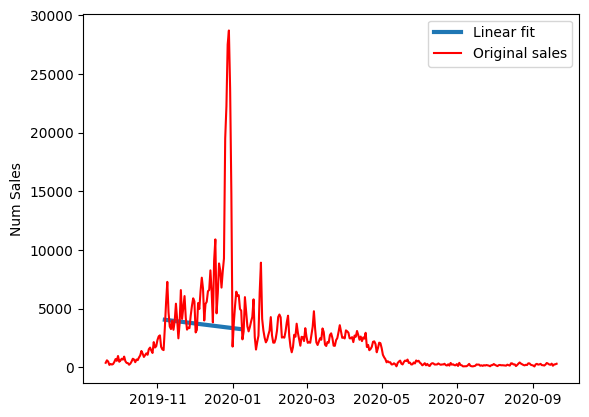

R^2 score for perfect model is -0.10914789174530504
MAE: 3642.848
4.320086710148229


In [ ]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

X_train=pd.to_datetime(Total_sales['day'])
y_train= Total_sales['num_sales'].values.reshape(-1, 1)
X_test=pd.to_datetime(promotional_sales['day'])
y_test=promotional_sales['num_sales'].values.reshape(-1,1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train.values.reshape(-1, 1),y_train)

predictions = lm.predict(X_test.values.astype(float).reshape(-1, 1))

plt.figure(figsize=(10,10))
f, ax = plt.subplots(1, 1)
ax.plot(X_test,predictions,label='Linear fit', lw=3)
ax.plot(X_train,y_train,label='Original sales', color='r')
plt.ylabel('Num Sales')
ax.legend()
#score = accuracy_score(y_test,prediction)
#print('R^2 score for perfect model is', score)
plt.show()

r2 = r2_score(y_test, predictions)
print('R^2 score for perfect model is', r2)
mae = mean_absolute_error(y_test, predictions)
print('MAE: %.3f' % mae)

#Measure of skewness
print(Total_sales['num_sales'].skew())


In [ ]:
# Random Forest model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train.values.reshape(-1, 1), y_train)
rf_predictions = rf.predict(X_test.values.astype(float).reshape(-1, 1))

plt.figure(figsize=(10,10))
f, ax = plt.subplots(1, 1)
ax.plot(X_test,rf_predictions,label='Random forest fit', lw=3)
ax.plot(X_train,y_train,label='Original sales', color='r')
plt.ylabel('Num Sales')
ax.legend()
#score = accuracy_score(y_test,prediction)
#print('R^2 score for perfect model is', score)
plt.show()

r2 = r2_score(y_test, rf_predictions)
print('R^2 score for perfect model is', r2)
mae = mean_absolute_error(y_test, rf_predictions)
print('MAE: %.3f' % mae)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test)

# Calculate the mean squared error of the predictions
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

In [ ]:
# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


In [ ]:
Groups = pd.merge(df_merged, df_groups ,on='sku', how='left' )

In [ ]:
Groups.head()

,day,sku,promo_id,num_sales,supplier_price,selling_price,region_name,Promo_type,Offer_ID,start_date,end_date,promotional_day,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4
0,2019-12-30,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,1.000,96.77,118.99,152f1b77a32508570e2745daf9ce7aec,Biweekly,287,2020-03-19,2020-04-01,False,44a7b825383402ed937a15fb8a5bb12a,d645920e395fedad7bbbed0eca3fe2e0,6693a7aacb8a2e74c6f5fe91bc39864b,878b4140ebdb1b79f378d2cf0cc3245c
1,2019-12-30,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,1.000,96.77,118.99,152f1b77a32508570e2745daf9ce7aec,Biweekly,369,2020-06-25,2020-07-08,False,44a7b825383402ed937a15fb8a5bb12a,d645920e395fedad7bbbed0eca3fe2e0,6693a7aacb8a2e74c6f5fe91bc39864b,878b4140ebdb1b79f378d2cf0cc3245c
2,2019-12-30,40e1372e6aebbf19d15dbf80150f96c5,314afc461f361ebf6d9bcc75eb1de65c,0.938,141.33,211.05,152f1b77a32508570e2745daf9ce7aec,Facades,F242,2019-12-12,2019-12-18,False,cc9284597026dcc021735c0970ca0c93,1ff1de774005f8da13f42943881c655f,b53477c2821c1bf0da5d40e57b870d35,82266644483c41f453de682b9c0c9c81
3,2019-12-30,81897979a2b7322a3854e02eaa8f79ca,7215ee9c7d9dc229d2921a40e899ec5f,2.000,221.37,399.02,152f1b77a32508570e2745daf9ce7aec,Seasonal,459,2020-01-28,2020-02-10,False,44a7b825383402ed937a15fb8a5bb12a,7f39f8317fbdb1988ef4c628eba02591,7bec7e63a493e2d61891b1e4051ef75a,556ef5548b49b2fa22f88a921feae370
4,2019-12-30,f4d3eafd51353fcf6d574d457ad57a61,b9ec0ad93799142a8511180e9f195ae5,1.000,83.82,129.43,152f1b77a32508570e2745daf9ce7aec,Seasonal,108,2020-04-07,2020-04-20,False,44a7b825383402ed937a15fb8a5bb12a,d645920e395fedad7bbbed0eca3fe2e0,6693a7aacb8a2e74c6f5fe91bc39864b,919285a1ee59546de33e036caadad3cb


In [ ]:
products_grp = Groups[Groups['hierarchy_level2'] == '6f4922f45568161a8cdf4ad2299f6d23']

In [ ]:
no_promo_products_grp = products_grp[products_grp['promotional_day'] == False]

In [ ]:
promo_products_grp = products_grp[products_grp['promotional_day'] == True]

<Axes: xlabel='day', ylabel='num_sales'>

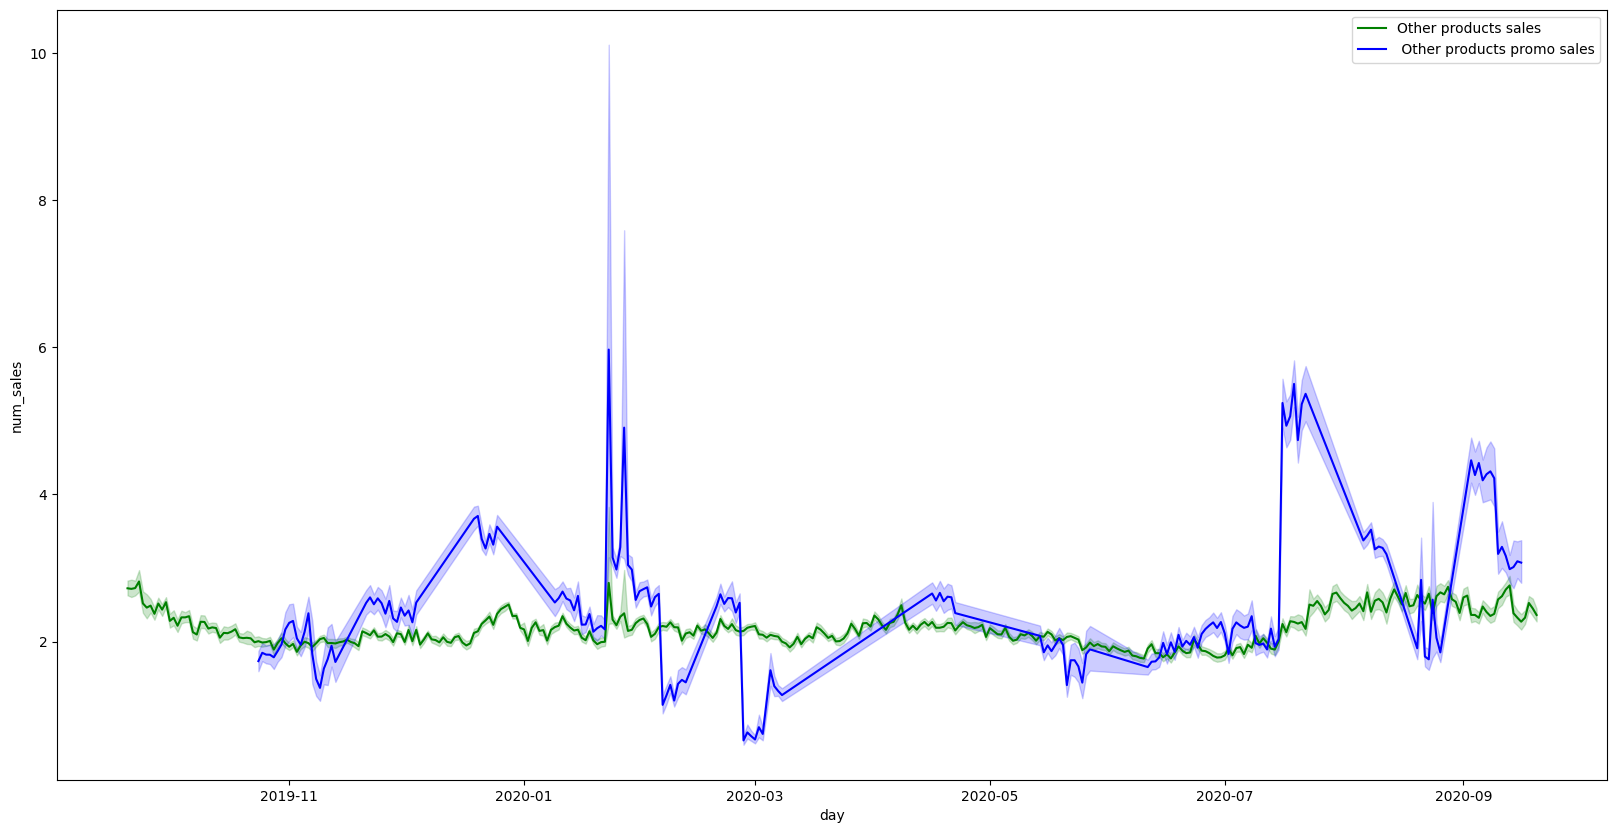

In [ ]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=no_promo_products_grp.day, y=no_promo_products_grp.num_sales, label='Other products sales', color = "Green")
sns.lineplot(x=promo_products_grp.day, y=promo_products_grp.num_sales, label=' Other products promo sales', color = "blue")



<Axes: xlabel='day', ylabel='num_sales'>

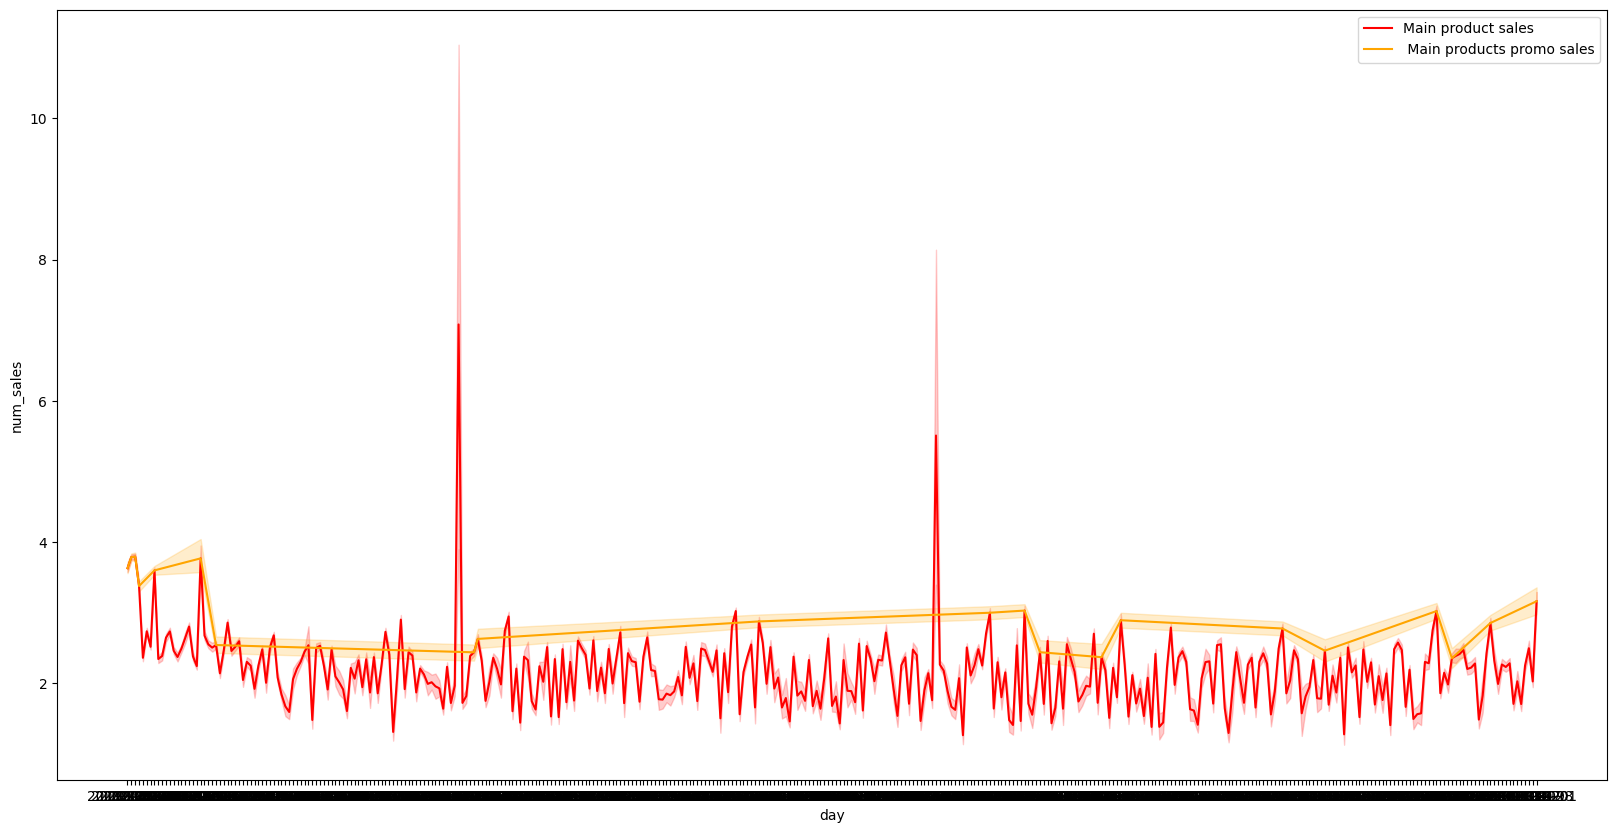

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=non_promo_data_df.day, y=non_promo_data_df.num_sales, label='Main product sales', color = "red")
sns.lineplot(x=promo_data_df.day, y=promo_data_df.num_sales, label=' Main products promo sales', color = "orange")

In [ ]:
products_grp.shape

(1171492, 16)

In [ ]:
products_grp.drop(products_grp[products_grp['sku'] == '1cbaaeb2212bbbe9d458ca9b81d74db7'].index, inplace=True)

<ipython-input-14-2717e56526fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_grp.drop(products_grp[products_grp['sku'] == '1cbaaeb2212bbbe9d458ca9b81d74db7'].index, inplace=True)


In [ ]:
products_grp.shape

(817048, 16)

<Axes: xlabel='day', ylabel='num_sales'>

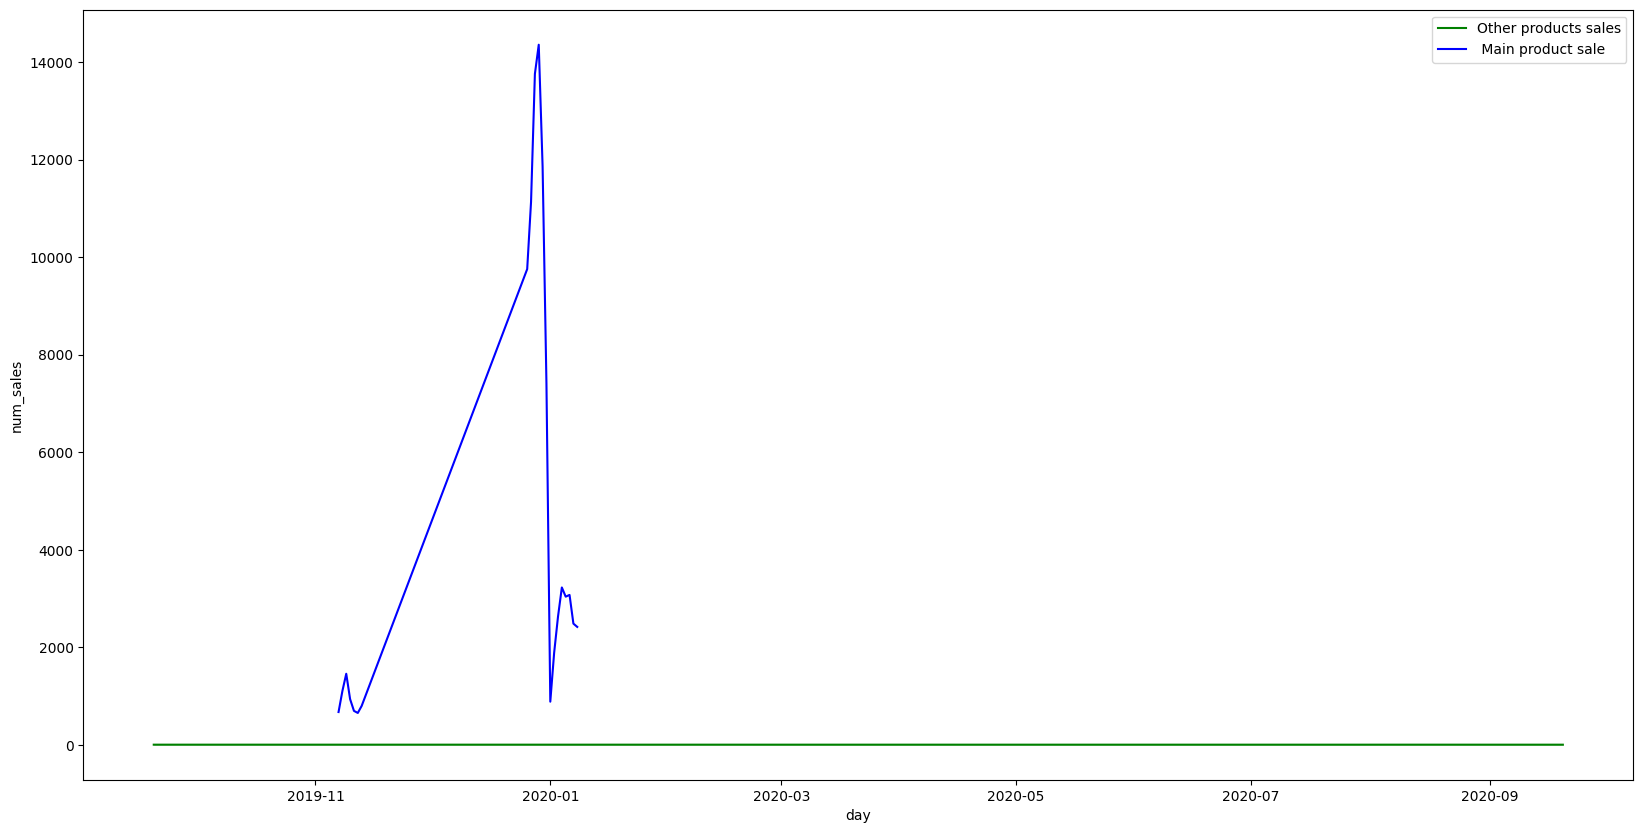

In [ ]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=products_grp.day, y=products_grp.num_sales, label='Other products sales', color = "Green")
sns.lineplot(x=promotional_sales.day, y=promotional_sales.num_sales, label=' Main product sale', color = "blue")

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

# Assuming you have a DataFrame df with your data and 'target' as your target variable
df = pd.read_csv('your_data.csv')  # replace 'your_data.csv' with your actual csv file

X = df.drop('target', axis=1)  # features
y = df['target']  # target variable

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

# Print the Mean Squared Error of the model on the test set
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [ ]:
import seaborn as sns

sns.countplot(data=df_offers, x='Promo_type', palette='Set2')
plt.title('Frequency of Promotion')
plt.xlabel('Promotion')
plt.ylabel('Frequency')

plt.show()

In [ ]:
df_offers["start_date"] = df_offers["start_date"].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())
df_offers["end_date"] = df_offers["end_date"].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())

In [ ]:
df_checks["day"] = df_checks["day"].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())

In [ ]:
all_dates = pd.DataFrame(
    [d.date() for d in pd.date_range(min_date, max_date, freq="D")],
    columns=["day"]
)

NameError: name 'min_date' is not defined

In [ ]:
all_dates["tmp"] = 0
df_offers["tmp"] = 0

df_offers_full = df_offers.merge(all_dates, on="tmp").drop(columns="tmp")

df_offers_full = (
    df_offers_full[
        (df_offers_full["day"] >= df_offers_full["start_date"])
        & (df_offers_full["day"] <= df_offers_full["end_date"])
    ]
)

In [ ]:
df_promo_calendar = (
    df_offers_full[df_offers_full["train_test_group"]=="train"]
    .groupby(["sku", "start_date", "end_date", "day"])
    .agg(
        {
            "Offer_ID": pd.Series.nunique,
        }
    )
).reset_index()

In [ ]:
df_checks["unit_price"] = round(df_checks["selling_price"]/df_checks["num_sales"])

In [ ]:
df_sales_with_promo = (
    df_checks
    .merge(df_promo_calendar, on=["sku", "day"], how="left")
    .merge(df_groups, on=["sku"])
)

In [ ]:
df_sales_region_agg = (
    df_sales_with_promo
    .groupby(["sku", "region_name", "day"])
    .agg(
        {
            "unit_price": pd.Series.max,
            "start_date": pd.Series.min,
            "end_date": pd.Series.max,
            "num_sales": pd.Series.sum,
        }
    )
)

In [ ]:
df_sales_region_agg.reset_index(inplace=True)

In [ ]:
# df_sales_region_agg.to_pickle("sales_region_agg.pickle")
df_sales_region_agg = pd.read_pickle("sales_region_agg.pickle")

In [ ]:
df_sales_region_agg = df_sales_region_agg.merge(df_groups, on=["sku"])

In [ ]:
df_sales_region_agg['promo_duration'] = (df_sales_region_agg['end_date'] - df_sales_region_agg['start_date'])
df_sales_region_agg['promo_duration'] = df_sales_region_agg['promo_duration'].apply(lambda x: x.days if type(x)==datetime.timedelta else None)

In [ ]:
df_sales_region_agg['start_date'] = df_sales_region_agg['start_date'].astype('str')
df_sales_region_agg['end_date'] = df_sales_region_agg['end_date'].astype('str')
df_sales_region_agg['day'] = df_sales_region_agg['day'].astype('str')

In [ ]:
df_sales_region_cat = (
   df_sales_region_agg.sort_values(by=["region_name", "sku", "day"])
    .groupby(["hierarchy_level4", "region_name", "day"])
    .agg({
        "num_sales": "sum",
    })
).reset_index().rename(columns={"num_sales": "cat_sales"})


In [ ]:
df_sales_region_agg = df_sales_region_agg.merge(df_sales_region_cat, on=["hierarchy_level4", "region_name", "day"], how="outer")

In [ ]:
df_sales_region_agg.shape # 7313259

In [ ]:
df_sales_region_agg[
    (df_sales_region_agg.start_date=="2020-07-09")
    & (df_sales_region_agg.region_name=="152f1b77a32508570e2745daf9ce7aec")
    & (df_sales_region_agg["hierarchy_level4"]=='ee087215b0e0761bc986abd837ac7ab7')
]

In [ ]:
df_sales_filtered = df_sales_region_agg.sort_values(by=["region_name", "sku", "day"])
    # df_sales_region_agg[
        # (df_sales_region_agg["hierarchy_level4"]=="878b4140ebdb1b79f378d2cf0cc3245c")
        # (df_sales_region_agg["hierarchy_level4"]=="01247eb6470421cad3d92afdc82b48fa")
        # & (df_sales_region_agg["region_name"]=="152f1b77a32508570e2745daf9ce7aec")
    # ]
# ).sort_values(by="day")

In [ ]:
df_sales_filtered.head()

In [ ]:
df_before_promo = (
    df_sales_filtered #[(df_sales_filtered['start_date']=='nan') | (df_sales_filtered['start_date']==df_sales_filtered['day'])].sort_values(by=["sku", "region_name", "day"])
    # .sort_values(by=["sku", "region_name", "day"])
    [['num_sales', 'unit_price', 'sku', 'region_name']]
    .groupby(['sku', "region_name"])
    .rolling(window=7).mean().reset_index()
).rename(columns={"num_sales": "base_sales", "unit_price": "base_price", "level_2": "index"})

df_cat_before_promo = (
    df_sales_region_cat[['cat_sales', "hierarchy_level4", 'region_name']]
    .groupby(["hierarchy_level4", "region_name"])
    .rolling(window=7).mean().reset_index()
).rename(columns={"cat_sales": "cat_base_sales", "level_2": "index"})

df_cat_before_promo = (
    df_cat_before_promo.merge(df_sales_region_cat.drop(columns="cat_sales").reset_index(), on=["index", "hierarchy_level4", "region_name"])
).drop(columns="index")

df_before_promo = (
    df_before_promo.merge(df_sales_filtered.reset_index(), on=['index', 'sku', "region_name"])
).drop(columns="index")

df_before_promo = (
    df_before_promo[df_before_promo['day']==df_before_promo["start_date"]].merge(df_cat_before_promo, on=["hierarchy_level4", "region_name", "day"])
)[["sku", "hierarchy_level4", "region_name", "start_date", "end_date", "base_sales", "base_price", "cat_base_sales"]]

In [ ]:
df_before_promo[
    (df_before_promo.start_date=="2020-07-09")
    & (df_before_promo.region_name=="152f1b77a32508570e2745daf9ce7aec")
    & (df_before_promo["hierarchy_level4"]=='ee087215b0e0761bc986abd837ac7ab7')
] #.merge(df_groups[df_groups["hierarchy_level4"]=='ee087215b0e0761bc986abd837ac7ab7'], on=["sku"])

In [ ]:
df_sales_with_base = df_sales_filtered.merge(df_before_promo, on=["sku", "hierarchy_level4", "region_name", "start_date", "end_date"], how="left")

In [ ]:
df_sales_filtered.shape, df_sales_with_base.shape

In [ ]:
# df_sales_filtered[
#     (df_sales_filtered['promo_duration']>0)
#     & (df_sales_filtered['day']>="2019-11-20")
#     & (df_sales_filtered['day']<="2019-12-20")
# ]

In [ ]:
df_sales_with_base["base_revenue"] = df_sales_with_base["base_sales"]*df_sales_with_base["base_price"]
df_sales_with_base["revenue"] = df_sales_with_base["num_sales"]*df_sales_with_base["unit_price"]
df_sales_with_base["delta_revenue"] = df_sales_with_base["num_sales"]*df_sales_with_base["unit_price"] - df_sales_with_base["base_sales"]*df_sales_with_base["base_price"]
df_sales_with_base["delta_sales"] = df_sales_with_base["num_sales"] - df_sales_with_base["base_sales"]

In [ ]:
df_sales_with_base.columns

In [ ]:
df_promo_cnt = (
    df_sales_with_base.groupby(["hierarchy_level4", "region_name", "day"]).agg({"start_date": pd.Series.nunique})
).reset_index()

In [ ]:
df_promo_cnt[df_promo_cnt.start_date==2].head(10)

In [ ]:
# df_sales_with_base[
#     (df_sales_with_base["hierarchy_level4"]=="001d2d283b7f3c7378e363313b483e51")
#     & (df_sales_with_base["region_name"]=="152f1b77a32508570e2745daf9ce7aec")
#     & (df_sales_with_base["day"]>="2019-10-10")
#     & (df_sales_with_base["day"]<="2019-10-16")
# ]

In [ ]:
df_sku_promo_level = (
    df_sales_with_base
    .groupby(["sku", "hierarchy_level4", "region_name", "start_date", "end_date", "promo_duration"])
    .agg({
        "base_sales": "sum",
        "num_sales": "sum",
        "base_price": "max",
        "unit_price": "max",
        "base_revenue": "sum",
        "revenue": "sum",
        "delta_revenue": "sum",
        "delta_sales": "sum",
        "cat_base_sales": "sum",
        "cat_sales": "sum",
    })
).reset_index().rename(columns={"revenue": "promo_revenue", "num_sales": "promo_sales", "base_price": "regular_price", "unit_price": "promo_price", "cat_sales": "cat_promo_sales"})

In [ ]:
df_sku_promo_level[
    (df_sku_promo_level.start_date=="2019-10-10")
    & (df_sku_promo_level["hierarchy_level4"]=="001d2d283b7f3c7378e363313b483e51")
    & (df_sku_promo_level["region_name"]=="152f1b77a32508570e2745daf9ce7aec")
]

In [ ]:
df_sku_promo_level[
    (df_sku_promo_level.cat_base_sales>df_sku_promo_level.cat_promo_sales)
    & (df_sku_promo_level.delta_revenue>0)
]

In [ ]:
df_sku_promo_level['is_effective_cat'] = (df_sku_promo_level.cat_base_sales<df_sku_promo_level.cat_promo_sales).astype(int)

In [ ]:
df_sku_promo_level['is_effective_sku'] = (df_sku_promo_level.base_sales<df_sku_promo_level.promo_sales).astype(int)

In [ ]:
df_sku_promo_level['is_effective_cat'].value_counts(normalize=True)

In [ ]:
df_sku_promo_level['is_effective_sku'].value_counts(normalize=True)

In [ ]:
pd.crosstab(df_sku_promo_level['is_effective_cat'], df_sku_promo_level['is_effective_sku'])

In [ ]:
df_sku_promo_level[(df_sku_promo_level.is_effective_cat==0) & (df_sku_promo_level.is_effective_sku==1)]

In [ ]:
(790+1422)/(790+1422+467+11839)

In [ ]:
df_hr_sample = (
    df_sales_with_base[
        (df_sales_with_base["hierarchy_level4"]=="001d2d283b7f3c7378e363313b483e51")
        & (df_sales_with_base["region_name"]=="152f1b77a32508570e2745daf9ce7aec")
    ]
)

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
df_hr_sample['sku'] = le.fit_transform(df_hr_sample.sku.values)
df_hr_sample['sku'] = df_hr_sample['sku'].astype(str)

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
le_name_mapping['010e08f39dff53d27b1ddfc0ffb59ecd']

In [ ]:
2019-10-29	2019-11-18

In [ ]:
# sample = df_sales_filtered[
    # (df_sales_filtered["day"]>="2019-11-20")
    # & (df_sales_filtered["day"]<="2019-12-18")
    # (df_sales_filtered["day"]>="2019-01-20")
    # & (df_sales_filtered["day"]<="2019-12-32")]
sample = df_hr_sample[(df_hr_sample["day"]>="2019-10-03")&(df_hr_sample["day"]<="2019-10-19")].pivot(index=["day"], columns=["sku"], values=["num_sales", "unit_price"])

In [ ]:
df_sales_region_agg[
    (df_sales_region_agg["day"]=="2019-11-01")
    & (df_sales_region_agg["region_name"]=="152f1b77a32508570e2745daf9ce7aec")
    & (df_sales_region_agg["sku"]=="010e08f39dff53d27b1ddfc0ffb59ecd")
]

In [ ]:
# df_checks[
#     (df_checks["day"]==datetime.date(2019, 11, 1))
#     & (df_checks["region_name"]=="152f1b77a32508570e2745daf9ce7aec")
#     & (df_checks["sku"]=="010e08f39dff53d27b1ddfc0ffb59ecd")
# ]

In [ ]:
# df_hr_sample[
#     (df_hr_sample["day"]>="2020-07-01")
#     & (df_hr_sample["day"]<="2020-07-28")
#     & (df_hr_sample["start_date"]<="2020-07-09")
# ].sku.unique()

In [ ]:
sample.dropna(how="all", axis=1)

In [ ]:
sample.columns = list(map("_".join, sample.columns))
sample.reset_index(inplace=True)

In [ ]:
sales_columns = [c for c in sample.columns if "num_sales" in c]

In [ ]:
sample.columns

# Example of effective promo?

In [ ]:
sample.set_index("day")[sales_columns].sum(axis=1)

In [ ]:
# sample.to_excel("sample_lenta_promo.xlsx", index=False)

In [ ]:
sample.set_index("day")[[f'num_sales_{0}', f'unit_price_{0}']].plot()

# Plot sales and prices

In [ ]:
for i in range(0,100):
    if f'num_sales_{i}' in sample.columns:
        sample.set_index("day")[[f'num_sales_{i}', f'unit_price_{i}']].plot()

In [ ]:
sample[(sample.day>="2020-05-01")&(sample.day<="2020-06-28")].set_index("day")[[f'num_sales_{0}', f'unit_price_{0}']].plot()

In [ ]:
list(sample.columns)

In [ ]:
# for i in range(33):
#     print(f"'num_sales_{i}', 'unit_price_{i}',")

# Example

In [ ]:
sample.set_index("day")[['num_sales_10', 'num_sales_11', 'num_sales_13', 'num_sales_2',
       'num_sales_3', 'num_sales_5', 'num_sales_8', 'num_sales_9',]].dropna(how="all",axis=1).plot()